In [ ]:
#1）原分类变量为空值且为单独属性加上空属性作为新属性.fillna('No_access',inplace=True)

#2）考虑用何种进行替代，分类用众数？连续用中值？

In [259]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [260]:
train=pd.read_csv('C:/Users/Administrator/Scikit_learn/HOUSEPRICE/train.csv',delimiter=',',header=0)
test=pd.read_csv('C:/Users/Administrator/Scikit_learn/HOUSEPRICE/test.csv',delimiter=',',header=0)
#用/
df=pd.concat([train,test],axis=0)


In [261]:
#1）原分类变量为空值且为单独属性加上空属性作为新属性
df.Alley.fillna('No_access',inplace=True)
df.PoolQC.fillna('No_pool',inplace=True)
df.MiscFeature.fillna('None',inplace=True)
df.Fence.fillna('No_fence',inplace=True)
df.FireplaceQu.fillna('No_fireplace',inplace=True)



df.MasVnrType.fillna('No_data',inplace=True)
df.BsmtQual.fillna('No_data',inplace=True)
df.BsmtCond.fillna('No_data',inplace=True)
df.BsmtExposure.fillna('No_data',inplace=True)
df.BsmtFinType1.fillna('No_data',inplace=True)
df.BsmtFinType2.fillna('No_data',inplace=True)
df.GarageType.fillna('No_data',inplace=True)
df.GarageFinish.fillna('No_data',inplace=True)
df.GarageQual.fillna('No_data',inplace=True)
df.GarageCond.fillna('No_data',inplace=True)
df.Electrical.fillna('No_data',inplace=True)

df.MasVnrArea.fillna(df.MasVnrArea.median(),inplace=True)
df.GarageYrBlt.fillna(df.GarageYrBlt.median(),inplace=True)
df.GarageArea.fillna(df.GarageArea.median(),inplace=True)

df.MSZoning.fillna(df.MSZoning.mode().iloc[0],inplace=True)
df.Utilities.fillna(df.Utilities.mode().iloc[0],inplace=True)
df.Exterior1st.fillna(df.Exterior1st.mode().iloc[0],inplace=True)
df.Exterior2nd.fillna(df.Exterior2nd.mode().iloc[0],inplace=True)
df.BsmtFinSF1.fillna(df.BsmtFinSF1.mode().iloc[0],inplace=True)
df.BsmtFinSF2.fillna(df.BsmtFinSF2.mode().iloc[0],inplace=True)
df.BsmtUnfSF.fillna(df.BsmtUnfSF.mode().iloc[0],inplace=True)
df.BsmtFullBath.fillna(df.BsmtFullBath.mode().iloc[0],inplace=True)
df.HalfBath.fillna(df.HalfBath.mode().iloc[0],inplace=True)
df.TotalBsmtSF.fillna(df.TotalBsmtSF.mode().iloc[0],inplace=True)
df.BsmtHalfBath.fillna(df.BsmtHalfBath.mode().iloc[0],inplace=True)


df.BsmtHalfBath.fillna(df.BsmtHalfBath.mode().iloc[0],inplace=True)
df.KitchenQual.fillna(df.KitchenQual.mode().iloc[0],inplace=True)
df.Functional.fillna(df.Functional.mode().iloc[0],inplace=True)
df.GarageCars.fillna(df.GarageCars.mode().iloc[0],inplace=True)
df.BsmtHalfBath.fillna(df.BsmtHalfBath.mode().iloc[0],inplace=True)
df.SaleType.fillna(df.SaleType.mode().iloc[0],inplace=True)


In [262]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 81 columns):
1stFlrSF         2919 non-null int64
2ndFlrSF         2919 non-null int64
3SsnPorch        2919 non-null int64
Alley            2919 non-null object
BedroomAbvGr     2919 non-null int64
BldgType         2919 non-null object
BsmtCond         2919 non-null object
BsmtExposure     2919 non-null object
BsmtFinSF1       2919 non-null float64
BsmtFinSF2       2919 non-null float64
BsmtFinType1     2919 non-null object
BsmtFinType2     2919 non-null object
BsmtFullBath     2919 non-null float64
BsmtHalfBath     2919 non-null float64
BsmtQual         2919 non-null object
BsmtUnfSF        2919 non-null float64
CentralAir       2919 non-null object
Condition1       2919 non-null object
Condition2       2919 non-null object
Electrical       2919 non-null object
EnclosedPorch    2919 non-null int64
ExterCond        2919 non-null object
ExterQual        2919 non-null object
Exterior1st      29

In [263]:
from sklearn.neighbors import KNeighborsRegressor
LotFrontAge=df[['MSSubClass','LotArea','1stFlrSF','GrLivArea','LotFrontage']]
known_LotFrontage=LotFrontAge[LotFrontAge.LotFrontage.notnull()].as_matrix()
unknown_LotFrontage=LotFrontAge[LotFrontAge.LotFrontage.isnull()].as_matrix()
X_train=known_LotFrontage[:,0:-1]
y_train=known_LotFrontage[:,-1]
clf_lot=KNeighborsRegressor()
clf_lot.fit(X_train,y_train)
predict_unknown_LotFrontage=clf_lot.predict(unknown_LotFrontage[:,0:-1])
unknown_LotFrontage=[unknown_LotFrontage,predict_unknown_LotFrontage]
df.loc[(df.LotFrontage.isnull()),'LotFrontage']=predict_unknown_LotFrontage

In [264]:
from sklearn.preprocessing import LabelBinarizer,OneHotEncoder,LabelEncoder,StandardScaler
le=LabelEncoder()
types=df.dtypes
types2=types[types==object]
df.info()
for i in types2.index:
    df[i]=le.fit_transform(df[i])

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 81 columns):
1stFlrSF         2919 non-null int64
2ndFlrSF         2919 non-null int64
3SsnPorch        2919 non-null int64
Alley            2919 non-null object
BedroomAbvGr     2919 non-null int64
BldgType         2919 non-null object
BsmtCond         2919 non-null object
BsmtExposure     2919 non-null object
BsmtFinSF1       2919 non-null float64
BsmtFinSF2       2919 non-null float64
BsmtFinType1     2919 non-null object
BsmtFinType2     2919 non-null object
BsmtFullBath     2919 non-null float64
BsmtHalfBath     2919 non-null float64
BsmtQual         2919 non-null object
BsmtUnfSF        2919 non-null float64
CentralAir       2919 non-null object
Condition1       2919 non-null object
Condition2       2919 non-null object
Electrical       2919 non-null object
EnclosedPorch    2919 non-null int64
ExterCond        2919 non-null object
ExterQual        2919 non-null object
Exterior1st      29

In [265]:
dummies_MSSubClass=pd.get_dummies(df['MSSubClass'],prefix='MSSubClass')
dummies_MSZoning=pd.get_dummies(df['MSZoning'],prefix='MSZoning')
dummies_Street=pd.get_dummies(df['Street'],prefix='Street')
dummies_Alley=pd.get_dummies(df['Alley'],prefix='Alley')
dummies_LotShape=pd.get_dummies(df['LotShape'],prefix='MSSubClass')
dummies_LandContour=pd.get_dummies(df['LandContour'],prefix='LandContour')
dummies_Utilities=pd.get_dummies(df['Utilities'],prefix='Utilities')
dummies_LotConfig=pd.get_dummies(df['LotConfig'],prefix='LotConfig')
dummies_LandSlope=pd.get_dummies(df['LandSlope'],prefix='MSSubClass')
dummies_Neighborhood=pd.get_dummies(df['Neighborhood'],prefix='Neighborhood')
dummies_Condition1=pd.get_dummies(df['Condition1'],prefix='Condition1')
dummies_Condition2=pd.get_dummies(df['Condition2'],prefix='Condition2')
dummies_BldgType=pd.get_dummies(df['BldgType'],prefix='BldgType')

dummies_HouseStyle=pd.get_dummies(df['HouseStyle'],prefix='HouseStyle')
dummies_OverallQual=pd.get_dummies(df['OverallQual'],prefix='OverallQual')
dummies_OverallCond=pd.get_dummies(df['OverallCond'],prefix='OverallCond')
dummies_RoofStyle=pd.get_dummies(df['RoofStyle'],prefix='RoofStyle')
dummies_RoofMatl=pd.get_dummies(df['RoofMatl'],prefix='RoofMatl')
dummies_Exterior1st=pd.get_dummies(df['Exterior1st'],prefix='Exterior1st')
dummies_Exterior2nd=pd.get_dummies(df['Exterior2nd'],prefix='Exterior2nd')
dummies_MasVnrType=pd.get_dummies(df['MasVnrType'],prefix='MasVnrType')
dummies_ExterQual=pd.get_dummies(df['ExterQual'],prefix='ExterQual')
dummies_ExterCond=pd.get_dummies(df['ExterCond'],prefix='ExterCond')
dummies_Foundation=pd.get_dummies(df['Foundation'],prefix='Foundation')
dummies_BsmtQual=pd.get_dummies(df['BsmtQual'],prefix='BsmtQual')
dummies_BsmtCond=pd.get_dummies(df['BsmtCond'],prefix='BsmtCond')
dummies_BsmtExposure=pd.get_dummies(df['BsmtExposure'],prefix='BsmtExposure')
dummies_BsmtFinType1=pd.get_dummies(df['BsmtFinType1'],prefix='BsmtFinType1')
dummies_BsmtFinType2=pd.get_dummies(df['BsmtFinType2'],prefix='BsmtFinType2')
dummies_Heating=pd.get_dummies(df['Heating'],prefix='Heating')
dummies_HeatingQC=pd.get_dummies(df['HeatingQC'],prefix='HeatingQC')
dummies_Electrical=pd.get_dummies(df['Electrical'],prefix='Electrical')
dummies_BsmtFullBath=pd.get_dummies(df['BsmtFullBath'],prefix='BsmtFullBath')
dummies_BsmtHalfBath=pd.get_dummies(df['BsmtHalfBath'],prefix='BsmtHalfBath')
dummies_FullBath=pd.get_dummies(df['FullBath'],prefix='FullBath')
dummies_HalfBath=pd.get_dummies(df['HalfBath'],prefix='HalfBath')
dummies_BedroomAbvGr=pd.get_dummies(df['BedroomAbvGr'],prefix='BedroomAbvGr')
dummies_KitchenAbvGr=pd.get_dummies(df['KitchenAbvGr'],prefix='KitchenAbvGr')
dummies_KitchenQual=pd.get_dummies(df['KitchenQual'],prefix='KitchenQual')
dummies_TotRmsAbvGrd=pd.get_dummies(df['TotRmsAbvGrd'],prefix='TotRmsAbvGrd')
dummies_Functional=pd.get_dummies(df['Functional'],prefix='Functional')
dummies_Fireplaces=pd.get_dummies(df['Fireplaces'],prefix='Fireplaces')
dummies_FireplaceQu=pd.get_dummies(df['FireplaceQu'],prefix='FireplaceQu')

dummies_GarageType=pd.get_dummies(df['GarageType'],prefix='GarageType')
dummies_GarageFinish=pd.get_dummies(df['GarageFinish'],prefix='GarageFinish')
dummies_GarageCars=pd.get_dummies(df['GarageCars'],prefix='GarageCars')
dummies_GarageQual=pd.get_dummies(df['GarageQual'],prefix='GarageQual')
dummies_GarageCond=pd.get_dummies(df['GarageCond'],prefix='GarageCond')
dummies_PavedDrive=pd.get_dummies(df['PavedDrive'],prefix='PavedDrive')
dummies_PoolQC=pd.get_dummies(df['PoolQC'],prefix='PoolQC')
dummies_Fence=pd.get_dummies(df['Fence'],prefix='Fence')
dummies_MiscFeature=pd.get_dummies(df['MiscFeature'],prefix='MiscFeature')
dummies_SaleType=pd.get_dummies(df['SaleType'],prefix='SaleType')
dummies_SaleCondition=pd.get_dummies(df['SaleCondition'],prefix='SaleCondition')


In [266]:
df_onehotencoder=pd.concat([df,dummies_MSSubClass,
                            dummies_MSZoning,dummies_Street,dummies_Alley,dummies_LotShape,dummies_LandContour,dummies_Utilities,
                            dummies_LotConfig,dummies_LandSlope,dummies_Neighborhood,dummies_Condition1,dummies_Condition2,dummies_BldgType,
                            dummies_HouseStyle,dummies_OverallQual,dummies_OverallCond,dummies_RoofStyle,dummies_RoofMatl,dummies_Exterior1st,
                            dummies_Exterior2nd,dummies_MasVnrType,dummies_ExterQual,dummies_ExterCond,dummies_Foundation,dummies_BsmtQual,
                            dummies_BsmtCond,dummies_BsmtExposure,dummies_BsmtFinType1,dummies_BsmtFinType2,dummies_Heating,dummies_HeatingQC,
                            dummies_Electrical,dummies_BsmtFullBath,dummies_BsmtHalfBath,dummies_FullBath,dummies_HalfBath,dummies_BedroomAbvGr,
                            dummies_KitchenAbvGr,dummies_KitchenQual,dummies_TotRmsAbvGrd,dummies_Functional,dummies_Fireplaces,dummies_FireplaceQu
 ],axis=1)
df_onehotencoder.drop(['MSSubClass','MSZoning','Street','Alley','LotShape','LandContour','Utilities','LotConfig','LandSlope','Neighborhood','Condition1',
         'Condition2','BldgType','HouseStyle','OverallQual','OverallCond','RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType',
         'ExterQual','ExterCond','Foundation','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','Heating','HeatingQC',
         'Electrical','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','KitchenQual','TotRmsAbvGrd',
         'Functional','Fireplaces','FireplaceQu'
],inplace=True,axis=1)
df_onehotencoder

,1stFlrSF,2ndFlrSF,3SsnPorch,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,CentralAir,EnclosedPorch,Fence,GarageArea,...,Fireplaces_1,Fireplaces_2,Fireplaces_3,Fireplaces_4,FireplaceQu_0,FireplaceQu_1,FireplaceQu_2,FireplaceQu_3,FireplaceQu_4,FireplaceQu_5
0,856,854,0,706.0,0.0,150.0,1,0,4,548.0,...,0,0,0,0,0,0,0,1,0,0
1,1262,0,0,978.0,0.0,284.0,1,0,4,460.0,...,1,0,0,0,0,0,0,0,0,1
2,920,866,0,486.0,0.0,434.0,1,0,4,608.0,...,1,0,0,0,0,0,0,0,0,1
3,961,756,0,216.0,0.0,540.0,1,272,4,642.0,...,1,0,0,0,0,0,1,0,0,0
4,1145,1053,0,655.0,0.0,490.0,1,0,4,836.0,...,1,0,0,0,0,0,0,0,0,1
5,796,566,320,732.0,0.0,64.0,1,0,2,480.0,...,0,0,0,0,0,0,0,1,0,0
6,1694,0,0,1369.0,0.0,317.0,1,0,4,636.0,...,1,0,0,0,0,0,1,0,0,0
7,1107,983,0,859.0,32.0,216.0,1,228,4,484.0,...,0,1,0,0,0,0,0,0,0,1
8,1022,752,0,0.0,0.0,952.0,1,205,4,468.0,...,0,1,0,0,0,0,0,0,0,1
9,1077,0,0,851.0,0.0,140.0,1,0,4,205.0,...,0,1,0,0,0,0,0,0,0,1


In [267]:
from sklearn.preprocessing import StandardScaler,scale
df_onehotencoder['LotFrontage']=scale(df_onehotencoder['LotFrontage'])
df_onehotencoder['LotArea']=scale(df_onehotencoder['LotArea'])
df_onehotencoder['YearBuilt']=scale(df_onehotencoder['YearBuilt'])
df_onehotencoder['YearRemodAdd']=scale(df_onehotencoder['YearRemodAdd'])
#df_onehotencoder['MasVnrArea']=scale(df_onehotencoder['MasVnrArea'])
df_onehotencoder['BsmtFinSF1']=scale(df_onehotencoder['BsmtFinSF1'])
df_onehotencoder['BsmtFinSF2']=scale(df_onehotencoder['BsmtFinSF2'])
df_onehotencoder['BsmtUnfSF']=scale(df_onehotencoder['BsmtUnfSF'])
df_onehotencoder['TotalBsmtSF']=scale(df_onehotencoder['TotalBsmtSF'])
df_onehotencoder['1stFlrSF']=scale(df_onehotencoder['1stFlrSF'])
df_onehotencoder['2ndFlrSF']=scale(df_onehotencoder['2ndFlrSF'])
df_onehotencoder['LowQualFinSF']=scale(df_onehotencoder['LowQualFinSF'])
df_onehotencoder['GrLivArea']=scale(df_onehotencoder['GrLivArea'])
#df_onehotencoder['GarageYrBlt']=scale(df_onehotencoder['GarageYrBlt'])
df_onehotencoder['GarageArea']=scale(df_onehotencoder['GarageArea'])
df_onehotencoder['WoodDeckSF']=scale(df_onehotencoder['WoodDeckSF'])
df_onehotencoder['OpenPorchSF']=scale(df_onehotencoder['OpenPorchSF'])
df_onehotencoder['EnclosedPorch']=scale(df_onehotencoder['EnclosedPorch'])
df_onehotencoder['3SsnPorch']=scale(df_onehotencoder['3SsnPorch'])
df_onehotencoder['PoolArea']=scale(df_onehotencoder['PoolArea'])
df_onehotencoder['MoSold']=scale(df_onehotencoder['MoSold'])
df_onehotencoder['YrSold']=scale(df_onehotencoder['YrSold'])

D:\Anaconda\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


In [268]:
from sklearn.preprocessing import StandardScaler,scale
df_onehotencoder['LotFrontage']=scale(df_onehotencoder['LotFrontage'])
df_onehotencoder['LotArea']=scale(df_onehotencoder['LotArea'])
df_onehotencoder['YearBuilt']=scale(df_onehotencoder['YearBuilt'])
df_onehotencoder['YearRemodAdd']=scale(df_onehotencoder['YearRemodAdd'])
#df_onehotencoder['MasVnrArea']=scale(df_onehotencoder['MasVnrArea'])
df_onehotencoder['BsmtFinSF1']=scale(df_onehotencoder['BsmtFinSF1'])
df_onehotencoder['BsmtFinSF2']=scale(df_onehotencoder['BsmtFinSF2'])
df_onehotencoder['BsmtUnfSF']=scale(df_onehotencoder['BsmtUnfSF'])
df_onehotencoder['TotalBsmtSF']=scale(df_onehotencoder['TotalBsmtSF'])
df_onehotencoder['1stFlrSF']=scale(df_onehotencoder['1stFlrSF'])
df_onehotencoder['2ndFlrSF']=scale(df_onehotencoder['2ndFlrSF'])
df_onehotencoder['LowQualFinSF']=scale(df_onehotencoder['LowQualFinSF'])
df_onehotencoder['GrLivArea']=scale(df_onehotencoder['GrLivArea'])
#df_onehotencoder['GarageYrBlt']=scale(df_onehotencoder['GarageYrBlt'])
df_onehotencoder['GarageArea']=scale(df_onehotencoder['GarageArea'])
df_onehotencoder['WoodDeckSF']=scale(df_onehotencoder['WoodDeckSF'])
df_onehotencoder['OpenPorchSF']=scale(df_onehotencoder['OpenPorchSF'])
df_onehotencoder['EnclosedPorch']=scale(df_onehotencoder['EnclosedPorch'])
df_onehotencoder['3SsnPorch']=scale(df_onehotencoder['3SsnPorch'])
df_onehotencoder['PoolArea']=scale(df_onehotencoder['PoolArea'])
df_onehotencoder['MoSold']=scale(df_onehotencoder['MoSold'])
df_onehotencoder['YrSold']=scale(df_onehotencoder['YrSold'])


In [269]:
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.neighbors import KNeighborsRegressor
y=df_onehotencoder['SalePrice'][0:1460]

scaler = StandardScaler().fit(y.reshape(-1,1))
y=scaler.transform(y.reshape(-1,1))
X=df_onehotencoder.drop(['SalePrice'],axis=1)[0:1460]
X_demo=df_onehotencoder.drop(['SalePrice'],axis=1)[1459:-1]
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.7,random_state=13)

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  """
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  
D:\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [270]:
clf_KNN=KNeighborsRegressor()
clf_KNN.fit(X_train,y_train)
predicts_knn=clf_KNN.predict(X_test)
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
cross_val_score(clf_KNN,X_train,y_train,cv=5,scoring='r2')
print('the r2_score is %s \tmean_absolute_error is %s \t the mean_squared_error is %s'%(r2_score(y_test,predicts_knn),mean_absolute_error(y_test,predicts_knn),mean_squared_error(y_test,predicts_knn)))




the r2_score is 0.268680470365 	mean_absolute_error is 0.61684774235 	 the mean_squared_error is 0.833450363814


In [271]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
cross_val_score(lr,X,y,cv=5)
lr.fit(X_train,y_train)
predicts_lr=lr.predict(X_test)
print('the r2_score is %s \tmean_absolute_error is %s \t the mean_squared_error is %s'%(r2_score(y_test,predicts_lr),mean_absolute_error(y_test,predicts_lr),mean_squared_error(y_test,predicts_lr)))


the r2_score is -1.44337369594e+12 	mean_absolute_error is 159599.019519 	 the mean_squared_error is 1.644944902e+12


In [272]:
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor()
print(cross_val_score(dt,X,y,cv=5))
dt.fit(X_train,y_train)
predicts_dt=dt.predict(X_test)
print('the r2_score is %s \tmean_absolute_error is %s \t the mean_squared_error is %s'%(r2_score(y_test,predicts_dt),mean_absolute_error(y_test,predicts_dt),mean_squared_error(y_test,predicts_dt)))


[ 0.63713525  0.62944529  0.81179465  0.7631391   0.66553788]
the r2_score is 0.505276417943 	mean_absolute_error is 0.40876432035 	 the mean_squared_error is 0.563813125104


In [273]:
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor(n_estimators=150)
print(cross_val_score(rfr,X,y,cv=5))
rfr.fit(X_train,y_train)
predicts_rfr=rfr.predict(X_test)
print('the r2_score is %s \tmean_absolute_error is %s \t the mean_squared_error is %s'%(r2_score(y_test,predicts_rfr),mean_absolute_error(y_test,predicts_rfr),mean_squared_error(y_test,predicts_rfr)))


D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change

[ 0.87296491  0.80244097  0.86342761  0.88256556  0.85270331]


D:\Anaconda\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


the r2_score is 0.783933581374 	mean_absolute_error is 0.273532957908 	 the mean_squared_error is 0.246240703159


D:\Anaconda\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, war

[ 0.79464804  0.7605195   0.8199624   0.78107951  0.76832627]


D:\Anaconda\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


the r2_score is 0.720374702872 	mean_absolute_error is 0.333764771613 	 the mean_squared_error is 0.318675758241


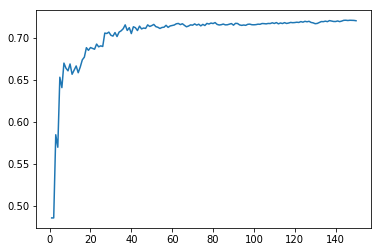

In [274]:
from sklearn.ensemble import AdaBoostRegressor
abr=AdaBoostRegressor(n_estimators=150)
print(cross_val_score(abr,X,y,cv=5))
abr.fit(X_train,y_train)
predicts_abr=abr.predict(X_test)
print('the r2_score is %s \tmean_absolute_error is %s \t the mean_squared_error is %s'%(r2_score(y_test,predicts_abr),mean_absolute_error(y_test,predicts_abr),mean_squared_error(y_test,predicts_abr)))
plt.plot(range(1,151),[accuracy for accuracy in abr.staged_score(X_test,y_test)])
plt.show()

In [275]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

Fitting 3 folds for each of 36 candidates, totalling 108 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    6.8s
[Parallel(n_jobs=-1)]: Done 108 out of 108 | elapsed:   56.5s finished
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:250: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params)


Best score: 0.854
Best parameter set:
	plf__criterion:'mse'
	plf__max_depth:150
	plf__min_samples_leaf:3
	plf__min_samples_split:3


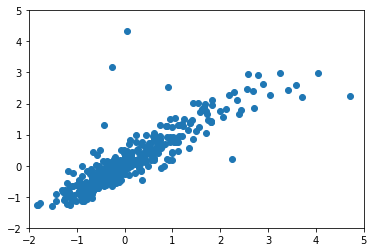

In [276]:
pipeline=Pipeline([
    ('plf',RandomForestRegressor())
])
parameters={
    #'plf__n_estimators':tuple(np.array(range(1,50))),
    'plf__criterion':('mse','mae'),
    'plf__max_depth':(150,155,160),
    'plf__min_samples_split':(2,3),
    'plf__min_samples_leaf':(1,2,3), 
    #'plf__bootstrap':(True,False),
}
grid_search=GridSearchCV(pipeline,parameters,n_jobs=-1,verbose=1,cv=3)
grid_search.fit(X_train,y_train)
print('Best score: %0.3f' %grid_search.best_score_)
print('Best parameter set:')
best_parameters=grid_search.best_estimator_.get_params()
for param_name in sorted(parameters.keys()):
    print('\t%s:%r'%(param_name ,best_parameters[param_name]))
predict_grid=grid_search.predict(X_test)
plt.scatter(y_test,predict_grid)
plt.axis([-2,5,-2,5])
plt.show()


In [277]:
from mlxtend.regressor import StackingRegressor
lr = LinearRegression()
sclf = StackingRegressor(regressors=[grid_search, abr, rfr], meta_regressor=lr)
print('3-fold cross validation:\n')
for clf, label in zip([grid_search, abr, rfr, sclf], 
                      ['grid_search', 
                       'abr', 
                       'rfr',
                       'StackingClassifier']):
    scores = cross_val_score(clf, X, y)

 
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))
sclf.fit(X_train,y_train)
predictions=sclf.predict(X_test)

3-fold cross validation:

Fitting 3 folds for each of 36 candidates, totalling 108 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    6.9s
[Parallel(n_jobs=-1)]: Done 108 out of 108 | elapsed:   52.3s finished
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:250: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params)


Fitting 3 folds for each of 36 candidates, totalling 108 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    6.6s
[Parallel(n_jobs=-1)]: Done 108 out of 108 | elapsed:   51.4s finished
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:250: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params)


Fitting 3 folds for each of 36 candidates, totalling 108 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    6.6s
[Parallel(n_jobs=-1)]: Done 108 out of 108 | elapsed:   52.1s finished
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:250: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params)


Accuracy: 0.84 (+/- 0.01) [grid_search]


D:\Anaconda\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.78 (+/- 0.03) [abr]


D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


Accuracy: 0.85 (+/- 0.02) [rfr]
Fitting 3 folds for each of 36 candidates, totalling 108 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    6.5s
[Parallel(n_jobs=-1)]: Done 108 out of 108 | elapsed:   52.0s finished
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:250: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\lib\site-packages\mlxtend\regressor\stacking_regression.py:150: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regr.fit(X, y)


Fitting 3 folds for each of 36 candidates, totalling 108 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    6.5s
[Parallel(n_jobs=-1)]: Done 108 out of 108 | elapsed:   53.3s finished
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:250: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\lib\site-packages\mlxtend\regressor\stacking_regression.py:150: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regr.fit(X, y)


Fitting 3 folds for each of 36 candidates, totalling 108 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    6.6s
[Parallel(n_jobs=-1)]: Done 108 out of 108 | elapsed:   52.2s finished
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:250: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\lib\site-packages\mlxtend\regressor\stacking_regression.py:150: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regr.fit(X, y)


Accuracy: 0.85 (+/- 0.02) [StackingClassifier]
Fitting 3 folds for each of 36 candidates, totalling 108 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    6.7s
[Parallel(n_jobs=-1)]: Done 108 out of 108 | elapsed:   55.3s finished
D:\Anaconda\lib\site-packages\sklearn\pipeline.py:250: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params)
D:\Anaconda\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\lib\site-packages\mlxtend\regressor\stacking_regression.py:150: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regr.fit(X, y)


In [282]:
predictions=sclf.predict(X_demo)
predictions2=rfr.predict(X_demo)
predictions_final2=scaler.inverse_transform(predictions.reshape(-1,1))
print(predictions_final2)


[[ 149223.30439228]
 [ 124671.90248029]
 [ 154523.71097328]
 ..., 
 [  77595.46775129]
 [ 154515.59635024]
 [ 107525.1331394 ]]


In [283]:
submission = pd.read_csv("C:/Users/Administrator/Scikit_learn/HOUSEPRICE/sample_submission.csv")
submission.iloc[:,1] = predictions_final2
submission.to_csv("final_submission2.csv", index=False)